# Web Scraping with BeautifulSoup

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from time import sleep
from time import time
from random import randint
from IPython.core.display import clear_output
import re

In [2]:
def scrape_price(classname,symbol):
    attribute_tags = soup.select(classname)
    attribute = []
    for i in attribute_tags:
        i = i.get_text(strip=True)
        if symbol not in i: 
            attribute.append('')
        else:
            pattern = re.compile(r'\$+')
            i_new = re.search(pattern, i).group(0)
            attribute.append(i_new)
    return attribute

In [3]:
def scrape_phone(classname,symbol):
    attribute_tags = soup.select(classname)
    attribute = []
    for i in attribute_tags:
        i = i.get_text(strip=True)
        if symbol not in i: 
            attribute.append('')
        else:
            i_new = i[12:26]
            attribute.append(i_new)
    return attribute

In [4]:
def scrape_attribute(classname):
    attribute_tags = soup.select(classname)
    attribute = [i.get_text(strip=True) for i in attribute_tags]
    return attribute

In [5]:
def scrape_review(classname):
    attribute_tags = soup.select(classname)
    attribute = [i.get_text(strip=True) for i in attribute_tags]
    new_review=[]
    for i in attribute:
        i = i.split()[0]
        i = int(i)
        new_review.append(i)
    return new_review

In [142]:
price_list=[]
phone_list=[]
type_list=[]
name_list=[]
neighbor_list=[]
review_list=[]
for i in ['180','240','300','360']:
    page = requests.get("https://www.yelp.com/search?find_loc=Civic+Center,+Manhattan,+NY&start="+i+"&cflt=restaurants")
    soup = BeautifulSoup(page.content, 'html.parser')
    price_list=price_list+scrape_price(".price-category","$")
    phone_list=phone_list+scrape_phone(".secondary-attributes","number")
    type_list=type_list+scrape_attribute(".category-str-list")
    name_list=name_list+scrape_attribute(".biz-name")
    neighbor_list=neighbor_list+scrape_attribute(".secondary-attributes")
    review_list=review_list+scrape_review(".review-count")

In [180]:
restaurant = pd.DataFrame({
        "name": name_list, 
        "phone": phone_list, 
        "category": type_list,
        "price": price_list,
    "review": review_list,})
restaurant

,name,phone,category,price,review
0,Iveria,(718) 758-5544,Georgian,,2
1,Tiny’s & the Bar Upstairs,(212) 374-1135,"Bars,American (New)",$$,492
2,Bobby Flay,,Restaurants,,2
3,Lighthouse Outpost,(646) 912-9422,"American (New),Breakfast & Brunch",$$,16
4,Paesano of Mulberry Street,(212) 965-1188,"Italian,Salad,Seafood",$$,530
5,Locanda Verde,(212) 925-3797,"Italian,Delis,Cocktail Bars",$$$,1471
6,Nobu Downtown,(212) 219-0500,"Japanese,Sushi Bars,Asian Fusion",$$$$,210
7,Suteishi,(212) 766-2344,"Japanese,Sushi Bars",$$$,411
8,Thai Sliders & Co.,(212) 406-4773,"Thai,Salad,Noodles",$$,285
9,Sweet Moment,(212) 226-8724,"Coffee & Tea,Ice Cream & Frozen Yogurt,Waffles",$$,553


# Simple Data Analysis

In [181]:
restaurant['low_price'] = restaurant['price'].map({'$':1, '$$':0, '$$$':0}).fillna(0)
restaurant['mid_price'] = restaurant['price'].map({'$':0, '$$':1, '$$$':0}).fillna(0)
restaurant['high_price'] = restaurant['price'].map({'$':0, '$$':0, '$$$':1}).fillna(0)

In [183]:
for i in restaurant['category']:
    x=i.split(',')
    type.append(x)
type

[['Georgian'],
 ['Italian', 'Delis', 'Cocktail Bars'],
 ['Japanese', 'Noodles', 'Vegan'],
 ['Gastropubs', 'Pubs', 'Breakfast & Brunch'],
 ['Coffee & Tea', 'Ice Cream & Frozen Yogurt', 'Waffles'],
 ['Dim Sum', 'Cantonese'],
 ['Chinese', 'Noodles'],
 ['Vietnamese'],
 ['Italian', 'Salad', 'Seafood'],
 ['American (New)', 'Breakfast & Brunch'],
 ['American (New)', 'Cafes'],
 ['Japanese', 'Sushi Bars', 'Asian Fusion'],
 ['Japanese', 'Sushi Bars'],
 ['Thai', 'Salad', 'Noodles'],
 ['Mongolian', 'Hot Pot', 'Chinese'],
 ['Bars', 'American (New)', 'Breakfast & Brunch'],
 ['Cocktail Bars', 'Seafood', 'French'],
 ['Seafood', 'Cocktail Bars'],
 ['Ramen', 'Sushi Bars', 'Noodles'],
 ['Poke', 'Hawaiian'],
 ['Mediterranean', 'Greek'],
 ['Seafood', 'Bars'],
 ['Seafood'],
 ['Bars', 'American (New)', 'Gastropubs'],
 ['Italian'],
 ['Burgers'],
 ['Coffee & Tea', 'Breakfast & Brunch'],
 ['Vietnamese', 'Chicken Shop'],
 ['Chinese', 'Taiwanese'],
 ['American (Traditional)', 'Pubs'],
 ['Chinese', 'Noodles'],
 ['

In [184]:
new_type=[]
for i in type:
    new_type = new_type+i

In [185]:
df=pd.DataFrame(new_type)

In [186]:
pop_type = df[0].value_counts()[:16]

In [187]:
restaurant.groupby('category')['review'].mean().sort_values(ascending=False)

category
Latin American,Breakfast & Brunch,Mexican               1852.000000
Japanese                                                1562.000000
Italian,Delis,Cocktail Bars                             1471.000000
Pizza,Italian,Beer Bar                                  1449.000000
Chinese,Seafood                                         1299.000000
American (Traditional),Breakfast & Brunch,Sandwiches    1169.000000
Italian,Cocktail Bars,Wine Bars                         1012.000000
Juice Bars & Smoothies,Vegetarian,Breakfast & Brunch     997.000000
Burgers,Coffee & Tea,Breakfast & Brunch                  980.000000
Steakhouses,American (Traditional)                       889.000000
Seafood,Bars,American (Traditional)                      872.000000
Dim Sum,Cantonese                                        821.500000
Sushi Bars,Ramen                                         814.000000
Mexican,Bars                                             745.000000
Pubs,German,Austrian                   

In [188]:
restaurant.head()

,name,phone,category,price,review,low_price,mid_price,high_price
0,Iveria,(718) 758-5544,Georgian,,2,0.0,0.0,0.0
1,Tiny’s & the Bar Upstairs,(212) 374-1135,"Bars,American (New)",$$,492,0.0,1.0,0.0
2,Bobby Flay,,Restaurants,,2,0.0,0.0,0.0
3,Lighthouse Outpost,(646) 912-9422,"American (New),Breakfast & Brunch",$$,16,0.0,1.0,0.0
4,Paesano of Mulberry Street,(212) 965-1188,"Italian,Salad,Seafood",$$,530,0.0,1.0,0.0


In [204]:
count = 0 
for i in restaurant['category']:
    if 'American' in i:
        restaurant['American'].iloc[count]=1
    else:
        restaurant['American'].iloc[count]=0
    count+=1
    

D:\Annaconda\Annaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [201]:
count = 0 
for i in restaurant['category']:
    if 'Chinese' in i:
        restaurant['Chinese'].iloc[count]=1
    else:
        restaurant['Chinese'].iloc[count]=0
    count+=1

D:\Annaconda\Annaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [195]:
count = 0 
for i in restaurant['category']:
    if 'Japanese' in i:
        restaurant['Japanese'].iloc[count]=1
    else:
        restaurant['Japanese'].iloc[count]=0
    count+=1

D:\Annaconda\Annaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [197]:
count = 0 
for i in restaurant['category']:
    if 'Italian' in i:
        restaurant['Italian'].iloc[count]=1
    else:
        restaurant['Italian'].iloc[count]=0
    count+=1

D:\Annaconda\Annaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [209]:
count = 0 
for i in restaurant['category']:
    if 'Breakfast' in i:
        restaurant['Breakfast'].iloc[count]=1
    else:
        restaurant['Breakfast'].iloc[count]=0
    count+=1

D:\Annaconda\Annaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
restaurant['price_new'] = restaurant['price'].map({'':'No Info', '$':'low price', '$$':'mid price', '$$$':'high price', '$$$$':'very high price'})

In [213]:
restaurant.loc[restaurant['American']==1, 'type'] = 'American'

In [215]:
restaurant.loc[restaurant['Japanese']==1, 'type'] = 'Japanese'
restaurant.loc[restaurant['Chinese']==1, 'type'] = 'Chinese'
restaurant.loc[restaurant['Italian']==1, 'type'] = 'Italian'
restaurant.loc[restaurant['Breakfast']==1, 'type'] = 'Breakfast'

In [216]:
restaurant.head(10)

,name,phone,category,price,review,low_price,mid_price,high_price,American,type,Japanese,Italian,Chinese,Breakfast
0,Iveria,(718) 758-5544,Georgian,,2,0.0,0.0,0.0,0,others,0,0,0,0
1,Tiny’s & the Bar Upstairs,(212) 374-1135,"Bars,American (New)",$$,492,0.0,1.0,0.0,1,American,0,0,0,0
2,Bobby Flay,,Restaurants,,2,0.0,0.0,0.0,0,others,0,0,0,0
3,Lighthouse Outpost,(646) 912-9422,"American (New),Breakfast & Brunch",$$,16,0.0,1.0,0.0,1,Breakfast,0,0,0,1
4,Paesano of Mulberry Street,(212) 965-1188,"Italian,Salad,Seafood",$$,530,0.0,1.0,0.0,0,Italian,0,1,0,0
5,Locanda Verde,(212) 925-3797,"Italian,Delis,Cocktail Bars",$$$,1471,0.0,0.0,1.0,0,Italian,0,1,0,0
6,Nobu Downtown,(212) 219-0500,"Japanese,Sushi Bars,Asian Fusion",$$$$,210,0.0,0.0,0.0,0,Japanese,1,0,0,0
7,Suteishi,(212) 766-2344,"Japanese,Sushi Bars",$$$,411,0.0,0.0,1.0,0,Japanese,1,0,0,0
8,Thai Sliders & Co.,(212) 406-4773,"Thai,Salad,Noodles",$$,285,0.0,1.0,0.0,0,others,0,0,0,0
9,Sweet Moment,(212) 226-8724,"Coffee & Tea,Ice Cream & Frozen Yogurt,Waffles",$$,553,0.0,1.0,0.0,0,others,0,0,0,0


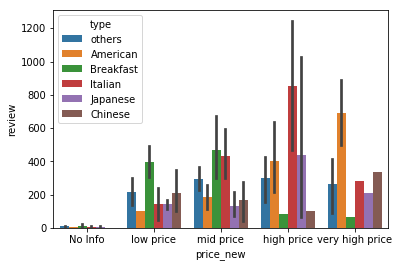

In [222]:
sns.barplot('price_new','review',data=restaurant,hue='type',order=['No Info','low price','mid price','high price','very high price'],errwidth=None)